#Các vấn đề gặp phải:
B : 8; G : 6; A : 4

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import tensorflow, glob, cv2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, Reshape, Conv2D, MaxPooling2D


In [ ]:
!unzip '/content/drive/MyDrive/Machine_Learning/printed_letter_digits_dataset.zip'

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: printed_letter_digits_dataset/U/173.png  
  inflating: printed_letter_digits_dataset/U/174.png  
  inflating: printed_letter_digits_dataset/U/175.png  
  inflating: printed_letter_digits_dataset/U/176.png  
 extracting: printed_letter_digits_dataset/U/177.png  
  inflating: printed_letter_digits_dataset/U/178.png  
  inflating: printed_letter_digits_dataset/U/179.png  
  inflating: printed_letter_digits_dataset/U/18.png  
  inflating: printed_letter_digits_dataset/U/180.png  
  inflating: printed_letter_digits_dataset/U/181.png  
 extracting: printed_letter_digits_dataset/U/182.png  
  inflating: printed_letter_digits_dataset/U/183.png  
  inflating: printed_letter_digits_dataset/U/184.png  
  inflating: printed_letter_digits_dataset/U/185.png  
 extracting: printed_letter_digits_dataset/U/186.png  
  inflating: printed_letter_digits_dataset/U/187.png  
  inflating: printed_letter_digits_dataset/U/188.png  
  inflati

In [ ]:
printed_LandD = []
for i in range(26):
    printed_LandD.append(chr(ord('A') + i))

for i in range(10):
    printed_LandD.append(f'{i}')

In [ ]:
printed_dictionary = {}

for i in range(36):
  onehot = [0 for i in range(36)]
  onehot[i] = 1
  printed_dictionary[printed_LandD[i]] = onehot

print(printed_dictionary)

{'A': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'B': [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'C': [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'D': [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'E': [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'F': [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'G': [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'H': [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'I': [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [ ]:
file_path = "/content/printed_letter_digits_dataset"
label_file = glob.glob(file_path+'/*')
check = glob.glob(file_path+'/*/*')
string_label_file = pd.DataFrame(label_file)
print(string_label_file)
#print(len(label_file))


                                           0
0   /content/printed_letter_digits_dataset/U
1   /content/printed_letter_digits_dataset/D
2   /content/printed_letter_digits_dataset/5
3   /content/printed_letter_digits_dataset/X
4   /content/printed_letter_digits_dataset/L
5   /content/printed_letter_digits_dataset/O
6   /content/printed_letter_digits_dataset/B
7   /content/printed_letter_digits_dataset/P
8   /content/printed_letter_digits_dataset/H
9   /content/printed_letter_digits_dataset/2
10  /content/printed_letter_digits_dataset/C
11  /content/printed_letter_digits_dataset/T
12  /content/printed_letter_digits_dataset/7
13  /content/printed_letter_digits_dataset/3
14  /content/printed_letter_digits_dataset/I
15  /content/printed_letter_digits_dataset/J
16  /content/printed_letter_digits_dataset/E
17  /content/printed_letter_digits_dataset/8
18  /content/printed_letter_digits_dataset/Z
19  /content/printed_letter_digits_dataset/9
20  /content/printed_letter_digits_dataset/6
21  /conte

In [ ]:
X = []
y = []

for i in label_file:
  LorD = i.replace(f'{file_path}/', '')
  #print(LorD)
  for j in printed_dictionary.keys():
    if LorD == j:
      LorD_file = glob.glob(file_path + f'/{LorD}/*')
      for k in range(len(LorD_file)):
        img = cv2.imread(LorD_file[k])
        img_canny = cv2.Canny(img, 100, 200)

        #Because the data from letter have a difference with real data from number plate
        if j.isdigit() == False:
          #Get contour
          contour, hierachy = cv2.findContours(img_canny.copy(),
                                      cv2.RETR_CCOMP,
                                      cv2.CHAIN_APPROX_SIMPLE)
          area_cnt = [cv2.contourArea(cnt) for cnt in contour]
          area_sort = np.argsort(area_cnt)[::-1]                  #Sort, pull largest contour to top
          cnt = contour[area_sort[0]]
          posx, posy, w, h = cv2.boundingRect(cnt)

          cut_img = img[posy:posy+h, posx:posx+w]
          cut_img = cv2.cvtColor(cv2.resize(cut_img, (64, 64)), cv2.COLOR_BGR2GRAY)
          # inverted_img = cv2.bitwise_not(cut_img)
          # dilated_img = cv2.dilate(inverted_img, kernel = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], np.uint8), iterations=1)
          # rs_img = cv2.bitwise_not(dilated_img)
          X.append(cut_img)
        else:
          img = cv2.cvtColor(cv2.resize(img, (64, 64)), cv2.COLOR_BGR2GRAY)
          X.append(img)
        y.append(printed_dictionary[j])

X = np.array(X)
y = np.array(y)

In [ ]:
print(len(X))

29205


[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


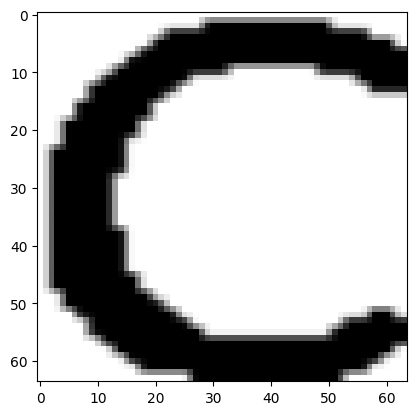

In [ ]:
plt.imshow(X[8600], 'gray')
print(y[8600])

#Give test for validation (test use for each letter or number in number plate)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

print((X_train.shape, y_train.shape), (X_test.shape, y_test.shape))

((26284, 64, 64), (26284, 36)) ((2921, 64, 64), (2921, 36))


Scale input data by divide 255 with gray img

In [ ]:
X_train_scaled = np.array(X_train)/255
X_test_scaled = np.array(X_test)/255

In [ ]:
print(X_train_scaled.shape)

(26284, 64, 64)


In [ ]:
inp = Input(shape = (64, 64, 1))
cnn = Conv2D(filters = 32, kernel_size = 2, activation = 'relu', padding='same')(inp)
pooling = MaxPooling2D(pool_size = (2,2))(cnn)
drop = Dropout(0.1)(pooling)

cnn = Conv2D(filters = 64, kernel_size = 2, activation = 'relu', padding='same')(drop)
pooling = MaxPooling2D(pool_size = (2,2))(cnn)
drop = Dropout(0.1)(pooling)

cnn = Conv2D(filters = 128, kernel_size = 2, activation = 'relu', padding='same')(drop)
pooling = MaxPooling2D(pool_size = (2,2))(cnn)

f = Flatten()(pooling)

fc1 = Dense(units = 512, activation = 'relu')(f)
fc2 = Dense(units = 192, activation = 'relu')(fc1)
out = Dense(units = 36, activation = 'softmax')(fc2)
#out = Dense(units = 1, activation = 'sigmoid')(fc2)

model = Model(inputs = inp, outputs = out)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                        

#Huấn luyện mô hình

In [ ]:
optimizer1 = tensorflow.keras.optimizers.Adam(learning_rate = 0.0002)
model.compile(optimizer = optimizer1, loss = "categorical_crossentropy", metrics = ['accuracy'])

history = model.fit(X_train_scaled, y_train, batch_size = 16, epochs = 40, validation_data = (X_test_scaled, y_test))

Epoch 1/40
1643/1643 [==============================] - 18s 7ms/step - loss: 0.2811 - accuracy: 0.9381 - val_loss: 0.0693 - val_accuracy: 0.9870
Epoch 2/40
1643/1643 [==============================] - 11s 7ms/step - loss: 0.0629 - accuracy: 0.9851 - val_loss: 0.0464 - val_accuracy: 0.9884
Epoch 3/40
1643/1643 [==============================] - 11s 7ms/step - loss: 0.0372 - accuracy: 0.9907 - val_loss: 0.0331 - val_accuracy: 0.9911
Epoch 4/40
1643/1643 [==============================] - 11s 7ms/step - loss: 0.0263 - accuracy: 0.9929 - val_loss: 0.0431 - val_accuracy: 0.9914
Epoch 5/40
1643/1643 [==============================] - 10s 6ms/step - loss: 0.0159 - accuracy: 0.9952 - val_loss: 0.0321 - val_accuracy: 0.9932
Epoch 6/40
1643/1643 [==============================] - 11s 7ms/step - loss: 0.0135 - accuracy: 0.9964 - val_loss: 0.0286 - val_accuracy: 0.9945
Epoch 7/40
1643/1643 [==============================] - 11s 7ms/step - loss: 0.0112 - accuracy: 0.9969 - val_loss: 0.0329 - val_ac

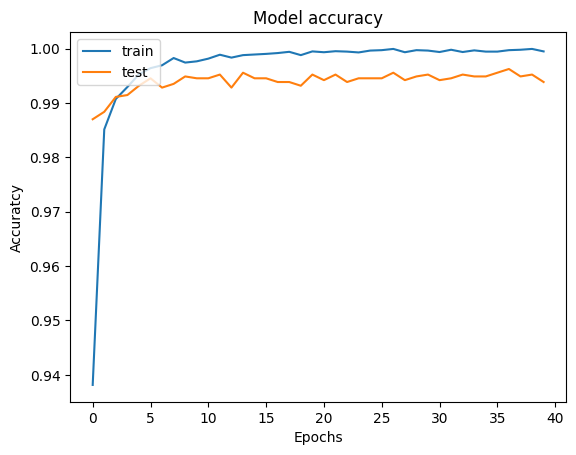

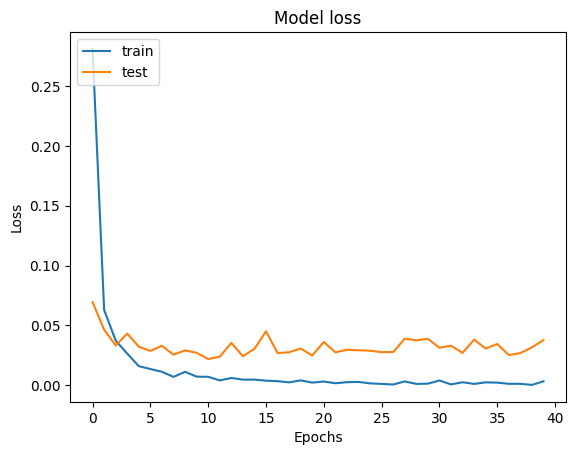

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuratcy')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

#Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.save('prited_LandD.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
